In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #im addicted to ggplot. so pretty.

In [2]:
from random import choice

def add_sing_trial(tar_pos,sing_pos):
    counter = 0
    item_vect = np.zeros((Items,1))
    while True:
        counter += 1
        #holder = np.random.exponential(Rate,size=(7,1))
        #holder[tar_pos] = np.random.exponential(tar_boost)
        holder = np.random.normal(Rate,size=(7,1))*sigma
        holder[tar_pos] += np.random.normal(tar_boost)#*sigma
        if sing_pos and counter <= pd_time:
            #holder[sing_pos] += np.random.exponential(sal_boost)
            holder[sing_pos] += np.random.normal(sal_boost)#*sigma
        elif sing_pos and counter > pd_time:
            holder[sing_pos] += -np.random.normal(pd_boost)#*sigma
            #holder[sing_pos] = 0
        
        holder += 1-holder[np.argmin(holder)]
        item_vect += holder/np.sum(holder)
        if np.sum(holder) < 1: print 'test'
        if np.any(item_vect > Threshold): break
    return {'RT':counter+np.random.normal(225),'Acc':np.argmax(item_vect) == tar_pos,'item_vect':item_vect,'tar_pos':tar_pos,'sing_pos':sing_pos}

basic additional singleton paradigm

698.470872308
718.615041772
1.0
1.0


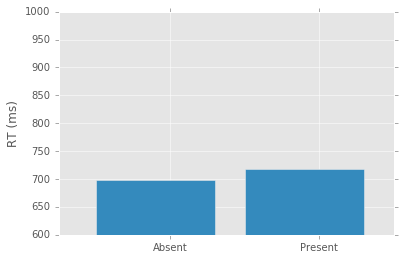

In [3]:
Items = 7
Threshold = 100
Rate = 1
pd_time = 250
sigma = 1.75

tar_boost = 2 #target uncertainty can decrease this score
sal_boost = 3
pd_boost = sal_boost+(sal_boost-tar_boost)/2.25

RT = []
Acc = []
trial_type = []

for trial in np.arange(1000):
    trial_type.append(choice([0,1]))
        
    tar_pos = choice(np.arange(7))
    
    if trial_type[trial] == 0: 
        sing_pos = []
    else:
        sing_pos = tar_pos
        while sing_pos == tar_pos:
            sing_pos = choice(np.arange(7))
            if sing_pos != tar_pos: break
    
    trial_dict = add_sing_trial(tar_pos,sing_pos)
    RT.append(trial_dict['RT'])
    Acc.append(trial_dict['Acc'])  
    
RT = np.array(RT)
Acc = np.array(Acc)
trial_type = np.array(trial_type)

plt.bar([0, 1],[np.mean(RT[(trial_type==0) & Acc==1]), np.mean(RT[(trial_type==1) & Acc==1])]);
plt.xticks([0.5, 1.5],['Absent', 'Present'])
plt.xlim([-0.25, 2])
plt.ylim([600, 1000])
plt.ylabel('RT (ms)')

print np.mean(RT[(trial_type==0) & Acc==1])
print np.mean(RT[(trial_type==1) & Acc==1])

print np.mean(Acc[trial_type==0])
print np.mean(Acc[trial_type==1])    

next i want to implement trials where the target can be a color singleton. both in the mixed and the non-mixed versions

717.578806443
698.752424483
719.185837534
1.0
1.0
1.0


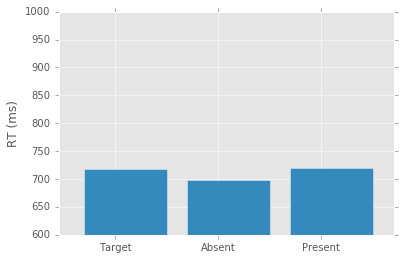

In [4]:
Items = 7
Threshold = 100
Rate = 1
pd_time = 250
sigma = 1.75

tar_boost = 2 #target uncertainty can decrease this score
sal_boost = 3
pd_boost = sal_boost+(sal_boost-tar_boost)/2.25

RT = []
Acc = []
trial_type = []

for trial in np.arange(1000):
    trial_type.append(choice([0,1]))
        
    tar_pos = choice(np.arange(7))
    
    if trial_type[trial] == 0: 
        sing_pos = []
    else:
        sing_pos = choice(np.arange(7))
    
    trial_dict = add_sing_trial(tar_pos,sing_pos)
    if trial_dict['tar_pos'] == trial_dict['sing_pos']: trial_type[trial] = 2
    RT.append(trial_dict['RT'])
    Acc.append(trial_dict['Acc'])  
    
RT = np.array(RT)
Acc = np.array(Acc)
trial_type = np.array(trial_type)

plt.bar(np.arange(3),[np.mean(RT[(trial_type==2) & Acc==1]), np.mean(RT[(trial_type==0) & Acc==1]), np.mean(RT[(trial_type==1) & Acc==1])]);
plt.xticks([0.3, 1.3, 2.3],['Target','Absent', 'Present'])
plt.xlim([-0.25, 3])
plt.ylim([600, 1000])
plt.ylabel('RT (ms)')

print np.mean(RT[(trial_type==2) & Acc==1])
print np.mean(RT[(trial_type==0) & Acc==1])
print np.mean(RT[(trial_type==1) & Acc==1])

print np.mean(Acc[trial_type==2]) 
print np.mean(Acc[trial_type==0])
print np.mean(Acc[trial_type==1])

762.26996873
822.313731635
1.0
1.0


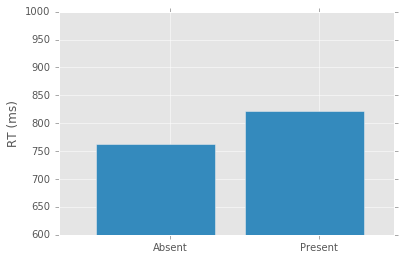

In [5]:
Items = 7
Threshold = 100
Rate = 1
pd_time = 250
sigma = 1.75

tar_boost = 1.25 #target uncertainty can decrease this score
sal_boost = 7
pd_boost = sal_boost+(sal_boost-tar_boost)/2.25

RT = []
Acc = []
trial_type = []

for trial in np.arange(1000):
    trial_type.append(choice([0,1]))
        
    tar_pos = choice(np.arange(7))
    
    if trial_type[trial] == 0: 
        sing_pos = []
    else:
        sing_pos = tar_pos
        while sing_pos == tar_pos:
            sing_pos = choice(np.arange(7))
            if sing_pos != tar_pos: break
    
    trial_dict = add_sing_trial(tar_pos,sing_pos)
    if trial_dict['tar_pos'] == trial_dict['sing_pos']: trial_type[trial] = 2
    RT.append(trial_dict['RT'])
    Acc.append(trial_dict['Acc'])  
    
RT = np.array(RT)
Acc = np.array(Acc)
trial_type = np.array(trial_type)

plt.bar([0, 1],[np.mean(RT[(trial_type==0) & Acc==1]), np.mean(RT[(trial_type==1) & Acc==1])]);
plt.xticks([0.5, 1.5],['Absent', 'Present'])
plt.xlim([-0.25, 2])
plt.ylim([600, 1000])
plt.ylabel('RT (ms)')

print np.mean(RT[(trial_type==0) & Acc==1])
print np.mean(RT[(trial_type==1) & Acc==1])

print np.mean(Acc[trial_type==0])
print np.mean(Acc[trial_type==1])  

776.036717522
763.503653522
822.330381671
0.988636363636
1.0
1.0


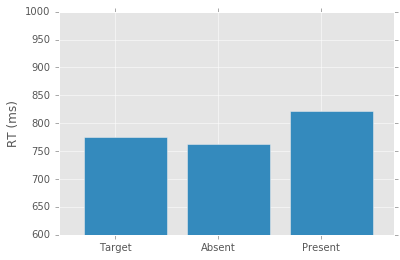

In [6]:
Items = 7
Threshold = 100
Rate = 1
pd_time = 250
sigma = 1.75

tar_boost = 1.25 #target uncertainty can decrease this score
sal_boost = 7
pd_boost = sal_boost+(sal_boost-tar_boost)/2.25

RT = []
Acc = []
trial_type = []

for trial in np.arange(1000):
    trial_type.append(choice([0,1]))
        
    tar_pos = choice(np.arange(7))
    
    if trial_type[trial] == 0: 
        sing_pos = []
    else:
        sing_pos = choice(np.arange(7))
    
    trial_dict = add_sing_trial(tar_pos,sing_pos)
    if trial_dict['tar_pos'] == trial_dict['sing_pos']: trial_type[trial] = 2
    RT.append(trial_dict['RT'])
    Acc.append(trial_dict['Acc'])  
    
RT = np.array(RT)
Acc = np.array(Acc)
trial_type = np.array(trial_type)

plt.bar(np.arange(3),[np.mean(RT[(trial_type==2) & Acc==1]), np.mean(RT[(trial_type==0) & Acc==1]), np.mean(RT[(trial_type==1) & Acc==1])]);
plt.xticks([0.3, 1.3, 2.3],['Target','Absent', 'Present'])
plt.xlim([-0.25, 3])
plt.ylim([600, 1000])
plt.ylabel('RT (ms)')

print np.mean(RT[(trial_type==2) & Acc==1])
print np.mean(RT[(trial_type==0) & Acc==1])
print np.mean(RT[(trial_type==1) & Acc==1])

print np.mean(Acc[trial_type==2]) 
print np.mean(Acc[trial_type==0])
print np.mean(Acc[trial_type==1])